In [1]:
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import re  # For text cleaning (regular expressions)
import string  # For removing punctuation
import nltk  # Natural Language Toolkit for NLP processing
from nltk.corpus import stopwords  # List of common stopwords
from nltk.tokenize import word_tokenize  # Splitting sentences into words
from nltk.stem import WordNetLemmatizer  # Reducing words to their root form
from IPython.display import display  # Better data display in Jupyter Notebook

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Load the Dataset
file_path = r"D:\fontys\dt2resit\Climate_twitter.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

#Explore the Dataset
display(df.head())  # Show first 5 rows in Jupyter Notebook
display(df.info())  # Show dataset summary (columns, missing values)

#Checking Missing Values and Duplicates
print("Missing values per column:\n", df.isnull().sum())  # Count missing values
df.drop_duplicates(inplace=True)  # Remove duplicate tweets
df.dropna(inplace=True)  # Remove rows with missing values
print("✅ Duplicates and missing values handled!")

#Defining Function to Categorize Sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

#Create a New Sentiment Column
df['sentiment'] = df['polarity'].apply(classify_sentiment)

#Check Sentiment Distribution
print("Sentiment Distribution:\n", df['sentiment'].value_counts())

#Sentiment Labels for ML Models
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)

#Updated DataFrame
display(df.head())

#Define Text Cleaning Function
def clean_text(text):
    """
    Function to clean text by removing URLs, mentions, hashtags, special characters, and extra spaces.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters, numbers, and punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

#Apply Cleaning Function to the Dataset
df['cleaned_text'] = df['text'].apply(clean_text)
print("✅ Text Cleaning Completed!")

#Tokenization (Splitting tweets into words)
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

#Remove Stopwords (e.g., "the," "is," "and")
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda words: [word for word in words if word not in stop_words])
print("✅ Stopwords Removed!")

#Lemmatization (Convert words to their root form)
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
print("✅ Lemmatization Done!")

#Save the Cleaned Dataset
df.to_csv("climate_sentiment_cleaned.csv", index=False)
print("✅ Data Preprocessing Complete. Cleaned dataset saved as 'climate_sentiment_cleaned.csv'.")

# Display first few rows of the cleaned dataset
display(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            396 non-null    int64  
 1   date          396 non-null    object 
 2   retweets      396 non-null    int64  
 3   source        396 non-null    object 
 4   author        396 non-null    object 
 5   likes         396 non-null    int64  
 6   text          396 non-null    object 
 7   twitter_name  396 non-null    object 
 8   location      293 non-null    object 
 9   verified      396 non-null    bool   
 10  followers     396 non-null    int64  
 11  friends       396 non-null    int64  
 12  polarity      396 non-null    float64
 13  subjectivity  396 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 40.7+ KB


None

Missing values per column:
 id                0
date              0
retweets          0
source            0
author            0
likes             0
text              0
twitter_name      0
location        103
verified          0
followers         0
friends           0
polarity          0
subjectivity      0
dtype: int64
✅ Duplicates and missing values handled!
Sentiment Distribution:
 positive    150
neutral      89
negative     54
Name: sentiment, dtype: int64


,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,sentiment,sentiment_label
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,positive,1
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,positive,1
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral,0
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral,0
5,18210270,2020-12-21 15:45:12,0,Hootsuite Inc.,MapsofWorld,0,For years now scientists and governments have ...,mapsofworld,"San Jose, US",False,5292,130,-0.121875,0.325000,negative,-1


✅ Text Cleaning Completed!
✅ Stopwords Removed!
✅ Lemmatization Done!
✅ Data Preprocessing Complete. Cleaned dataset saved as 'climate_sentiment_cleaned.csv'.


,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,sentiment,sentiment_label,cleaned_text,tokens,filtered_tokens,lemmatized_tokens
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,positive,1,elsevier and the editorsinchief are pleased to...,"[elsevier, and, the, editorsinchief, are, plea...","[elsevier, editorsinchief, pleased, share, fir...","[elsevier, editorsinchief, pleased, share, fir..."
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,positive,1,from better climate change education to improv...,"[from, better, climate, change, education, to,...","[better, climate, change, education, improved,...","[better, climate, change, education, improved,..."
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral,0,climate change links to fixing climate change ...,"[climate, change, links, to, fixing, climate, ...","[climate, change, links, fixing, climate, chan...","[climate, change, link, fixing, climate, chang..."
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,neutral,0,climate change the th hour for the earth clima...,"[climate, change, the, th, hour, for, the, ear...","[climate, change, th, hour, earth, climatechan...","[climate, change, th, hour, earth, climatechan..."
5,18210270,2020-12-21 15:45:12,0,Hootsuite Inc.,MapsofWorld,0,For years now scientists and governments have ...,mapsofworld,"San Jose, US",False,5292,130,-0.121875,0.325000,negative,-1,for years now scientists and governments have ...,"[for, years, now, scientists, and, governments...","[years, scientists, governments, discussed, de...","[year, scientist, government, discussed, debat..."


In [2]:
print("Columns in dataset:", df.columns)


Columns in dataset: Index(['id', 'date', 'retweets', 'source', 'author', 'likes', 'text',
       'twitter_name', 'location', 'verified', 'followers', 'friends',
       'polarity', 'subjectivity', 'sentiment', 'sentiment_label',
       'cleaned_text', 'tokens', 'filtered_tokens', 'lemmatized_tokens'],
      dtype='object')


In [3]:
print(df.head(10))  # Display the first 10 rows


                     id                 date  retweets  \
1             508658626  2020-12-10 14:30:00        14   
2            2607105006  2020-12-22 21:28:52         0   
3              19609660  2020-12-22 21:24:10         0   
4              19609660  2020-12-21 22:52:09         1   
5              18210270  2020-12-21 15:45:12         0   
6             380346763  2020-12-21 13:00:46         0   
7             154266844  2020-12-20 19:28:17         0   
8             610076827  2020-12-20 13:21:46         6   
9   1158881157473157120  2020-12-18 20:17:41         1   
10  1158881157473157120  2020-12-18 20:16:12         0   

                     source                        author  likes  \
1   Twitter for Advertisers               Elsevier Energy     98   
2           Twitter Web App                  Arwyn Thomas      1   
3           Twitter Web App  Tom Gillispie, EDITOR/WRITER      0   
4           Twitter Web App  Tom Gillispie, EDITOR/WRITER      1   
5            Hootsuit

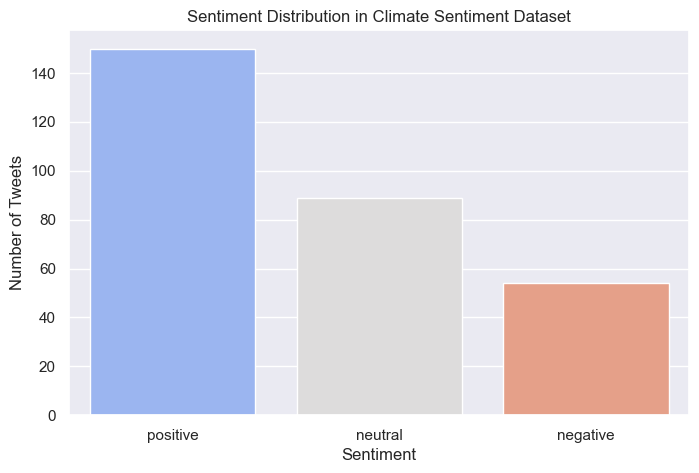

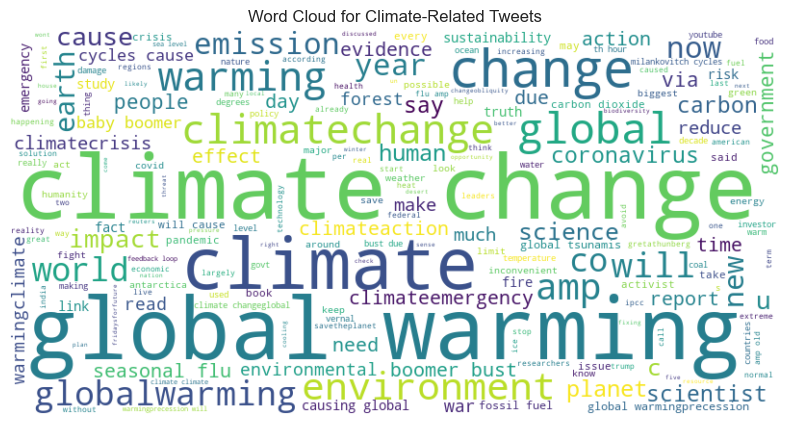

,Positive,Neutral,Negative
0,climate,climate,climate
1,change,global,change
2,global,change,global
3,warming,warming,warming
4,new,environment,amp
5,amp,climatechange,cause
6,world,cause,due
7,climatechange,co,environment
8,globalwarming,earth,co
9,environment,globalwarming,c


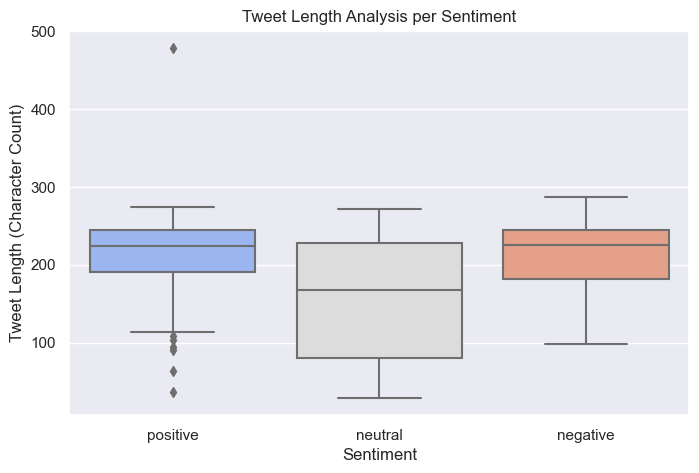

In [4]:
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # Advanced visualizations
from wordcloud import WordCloud  # For word cloud generation
from collections import Counter  # Counting word frequencies
import nltk

#Ensure inline visualization in Jupyter Notebook
%matplotlib inline  

#Seaborn for better visuals
sns.set(style="darkgrid")

#Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette='coolwarm', order=["positive", "neutral", "negative"])
plt.title("Sentiment Distribution in Climate Sentiment Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

#Word Cloud for All Tweets
all_words = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Climate-Related Tweets")
plt.show()

#Most Common Words in Each Sentiment Category
def get_most_common_words(sentiment_label, num_words=10):
    """
    Function to extract the most common words from a specific sentiment class.
    """
    sentiment_texts = df[df['sentiment'] == sentiment_label]['lemmatized_tokens'].tolist()
    sentiment_words = [word for tweet in sentiment_texts for word in tweet]  # Flatten list of lists
    word_counts = Counter(sentiment_words)
    return word_counts.most_common(num_words)

#top words for each sentiment
top_positive = get_most_common_words("positive", 10)
top_neutral = get_most_common_words("neutral", 10)
top_negative = get_most_common_words("negative", 10)

#Convert to DataFrame for Visualization
top_words_df = pd.DataFrame({
    "Positive": [word[0] for word in top_positive],
    "Neutral": [word[0] for word in top_neutral],
    "Negative": [word[0] for word in top_negative]
})

#top words per sentiment
display(top_words_df)

#Tweet Length Analysis
df['tweet_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sentiment'], y=df['tweet_length'], palette='coolwarm', order=["positive", "neutral", "negative"])
plt.title("Tweet Length Analysis per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (Character Count)")
plt.show()


✅ Logistic Regression Accuracy: 0.6441

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.18      0.31        11
           0       0.88      0.39      0.54        18
           1       0.59      0.97      0.73        30

    accuracy                           0.64        59
   macro avg       0.82      0.51      0.53        59
weighted avg       0.75      0.64      0.59        59



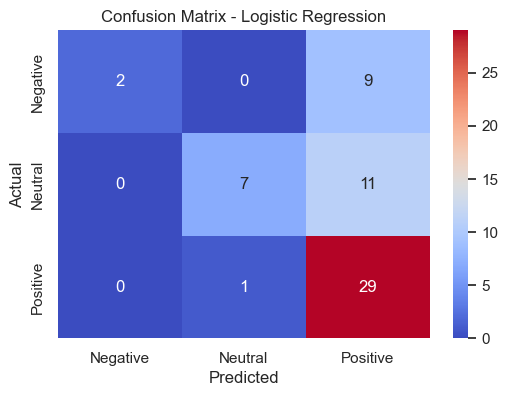

In [5]:
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.feature_extraction.text import TfidfVectorizer  # Text vectorization
from sklearn.linear_model import LogisticRegression  # ML Model
from sklearn.svm import SVC  # Support Vector Machine Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
import seaborn as sns
import matplotlib.pyplot as plt

#Split Data into Training and Testing Sets
X = df['cleaned_text']  # Features (Tweets)
y = df['sentiment_label']  # Labels (1 = Positive, 0 = Neutral, -1 = Negative)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Convert Text Data into Numerical Features Using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words for vectorization
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Train a Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

#Predict on Test Set
y_pred = logreg.predict(X_test_tfidf)

#Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


✅ Random Forest Accuracy: 0.7119

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.36      0.53        11
           0       0.68      0.72      0.70        18
           1       0.69      0.83      0.76        30

    accuracy                           0.71        59
   macro avg       0.79      0.64      0.66        59
weighted avg       0.75      0.71      0.70        59



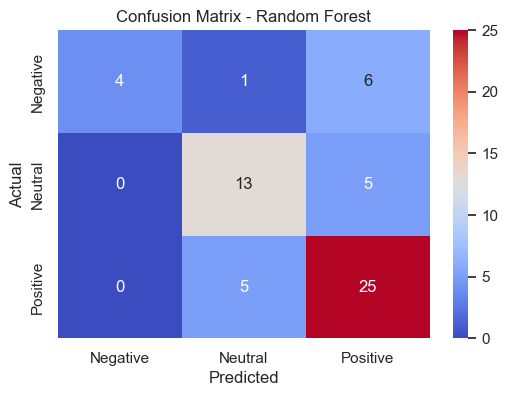

In [6]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
import seaborn as sns
import matplotlib.pyplot as plt

#Train a Random Forest Model
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)  # Using 200 trees
random_forest.fit(X_train_tfidf, y_train)

#Predict on Test Set
y_pred_rf = random_forest.predict(X_test_tfidf)

#Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

#Confusion Matrix Visualization
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
✅ Tuned Random Forest Accuracy: 0.6780

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.27      0.43        11
           0       0.67      0.67      0.67        18
           1       0.66      0.83      0.74        30

    accuracy                           0.68        59
   macro avg       0.77      0.59      0.61        59
weighted avg       0.72      0.68      0.66        59



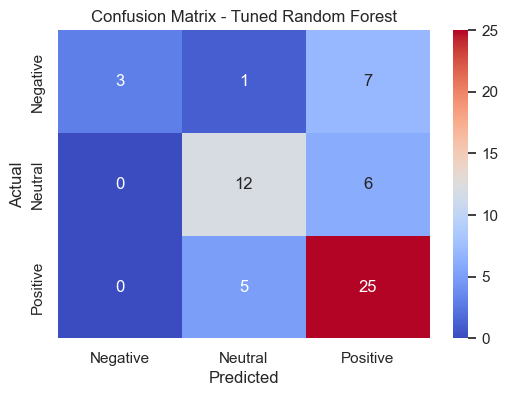

In [7]:
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model

#Define Hyperparameter Grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [10, 20, 30],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples needed to split a node
    "min_samples_leaf": [1, 2, 4]  # Minimum samples needed at a leaf node
}

#Run GridSearchCV
rf_tuned = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
rf_tuned.fit(X_train_tfidf, y_train)

#Display Best Hyperparameters
print("✅ Best Hyperparameters:", rf_tuned.best_params_)

#Train Optimized Random Forest Model
best_rf = RandomForestClassifier(
    n_estimators=rf_tuned.best_params_["n_estimators"],
    max_depth=rf_tuned.best_params_["max_depth"],
    min_samples_split=rf_tuned.best_params_["min_samples_split"],
    min_samples_leaf=rf_tuned.best_params_["min_samples_leaf"],
    random_state=42
)
best_rf.fit(X_train_tfidf, y_train)

#Predict on Test Set
y_pred_rf_tuned = best_rf.predict(X_test_tfidf)

#Evaluate Model Performance
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"✅ Tuned Random Forest Accuracy: {accuracy_rf_tuned:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

#Confusion Matrix Visualization
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Tokenization & Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])

X_sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X_padded = pad_sequences(X_sequences, maxlen=50, padding='post')

# Encode Sentiment Labels for Neural Network
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

#Split Data into Training & Testing Sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#Define LSTM Model (Fixed Embedding Layer)
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Fixed: Removed input_length
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train LSTM Model
history = model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=16, validation_data=(X_test_nn, y_test_nn))

#Evaluate Model Performance
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"✅ LSTM Model Accuracy: {accuracy:.4f}")

#Generate Predictions & Fix UndefinedMetricWarning
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)

# Fixed Classification Report
print("\nClassification Report:\n", classification_report(y_test_nn, y_pred_nn, target_names=label_encoder.classes_, zero_division=1))



Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.4986 - loss: 1.0721 - val_accuracy: 0.5085 - val_loss: 1.0272
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5607 - loss: 1.0119 - val_accuracy: 0.5085 - val_loss: 1.0207
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5247 - loss: 1.0034 - val_accuracy: 0.5085 - val_loss: 1.0078
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4886 - loss: 1.0091 - val_accuracy: 0.5932 - val_loss: 0.9297
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6797 - loss: 0.7306 - val_accuracy: 0.6441 - val_loss: 0.9244
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8311 - loss: 0.5095 - val_accuracy: 0.6441 - val_loss: 1.0359
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7531 - loss: 0.7286 - val_accuracy: 0.6610 - val_loss: 0.9898
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9050 - loss: 0.3855 - val_accuracy: 0.6780 - v

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Tokenization & Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])

X_sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X_padded = pad_sequences(X_sequences, maxlen=50, padding='post')

# Encode Sentiment Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

#Split Data into Training & Testing Sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#Define Improved LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Word embeddings

    SpatialDropout1D(0.3),  # Helps reduce overfitting

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # First BiLSTM Layer
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # Second BiLSTM Layer
    Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)),  # Third BiLSTM Layer

    Dense(64, activation='relu'),
    Dropout(0.5),  # Additional dropout layer for regularization
    Dense(3, activation='softmax')  # 3 Output Classes (Positive, Neutral, Negative)
])

#Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

#Train LSTM Model with Improved Settings
history = model.fit(X_train_nn, y_train_nn, epochs=15, batch_size=32, validation_data=(X_test_nn, y_test_nn))

#Evaluate Model Performance
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"✅ Improved LSTM Model Accuracy: {accuracy:.4f}")

#Generate Predictions & Fix UndefinedMetricWarning
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)

# Fixed Classification Report
print("\nClassification Report:\n", classification_report(y_test_nn, y_pred_nn, target_names=label_encoder.classes_, zero_division=1))



Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.3818 - loss: 1.0915 - val_accuracy: 0.5085 - val_loss: 1.0746
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5088 - loss: 1.0672 - val_accuracy: 0.5085 - val_loss: 1.0408
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4832 - loss: 1.0388 - val_accuracy: 0.5085 - val_loss: 1.0083
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5187 - loss: 1.0203 - val_accuracy: 0.5085 - val_loss: 0.9899
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5742 - loss: 0.9592 - val_accuracy: 0.5932 - val_loss: 0.9644
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5631 - loss: 0.9635 - val_accuracy: 0.5932 - val_loss: 0.9315
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5707 - loss: 0.9432 - val_accuracy: 0.6102 - val_loss: 0.9075
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6243 - loss: 0.9211 - val_accuracy: 0.5593 - val_loss: 0.9

In [2]:
import pandas as pd

file_path = r"D:\fontys\dt2resit\Climate_twitter.csv"  # Ensure the correct dataset is loaded
df = pd.read_csv(file_path)

#Check dataset structure
print(df.info())  # Ensures all expected columns exist
print(df.head())  # Displays sample data for verification

#Handle missing values & duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate tweets
df.dropna(inplace=True)  # Drop missing values if necessary

#Feature Engineering - Converting 'polarity' to 'sentiment'
def classify_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['polarity'].apply(classify_sentiment)

#Text Cleaning - Remove special characters, URLs, and lowercasing
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters, numbers, and punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Step 6: Verify the processed data
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            396 non-null    int64  
 1   date          396 non-null    object 
 2   retweets      396 non-null    int64  
 3   source        396 non-null    object 
 4   author        396 non-null    object 
 5   likes         396 non-null    int64  
 6   text          396 non-null    object 
 7   twitter_name  396 non-null    object 
 8   location      293 non-null    object 
 9   verified      396 non-null    bool   
 10  followers     396 non-null    int64  
 11  friends       396 non-null    int64  
 12  polarity      396 non-null    float64
 13  subjectivity  396 non-null    float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 40.7+ KB
None
           id                 date  retweets                   source  \
0  2184934963  2020-12-22 23:22:20        71          Twi

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Tokenization & Padding
tokenizer = Tokenizer(num_words=5000)  # Consider top 5000 words only
tokenizer.fit_on_texts(df['cleaned_text'])

X_sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X_padded = pad_sequences(X_sequences, maxlen=50, padding='post')

# Encode sentiment labels for Neural Network
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

#Split Data into Training & Testing Sets
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#Define LSTM Model with Comments
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Convert words to dense vector representation

    SpatialDropout1D(0.3),  # Dropout to prevent overfitting

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # First BiLSTM Layer
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # Second BiLSTM Layer
    Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)),  # Third BiLSTM Layer

    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Additional dropout for regularization
    Dense(3, activation='softmax')  # Output layer for 3 sentiment categories
])

#Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

#Train LSTM Model
history = model.fit(X_train_nn, y_train_nn, epochs=15, batch_size=32, validation_data=(X_test_nn, y_test_nn))

# Evaluate Model Performance
loss, accuracy = model.evaluate(X_test_nn, y_test_nn)
print(f"✅ LSTM Model Accuracy: {accuracy:.4f}")

#Generate Predictions & Fix UndefinedMetricWarning
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)

# Fixed Classification Report
print("\nClassification Report:\n", classification_report(y_test_nn, y_pred_nn, target_names=label_encoder.classes_, zero_division=1))


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.3752 - loss: 1.0953 - val_accuracy: 0.5085 - val_loss: 1.0690
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4901 - loss: 1.0648 - val_accuracy: 0.5085 - val_loss: 1.0375
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5052 - loss: 1.0339 - val_accuracy: 0.5085 - val_loss: 1.0136
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5488 - loss: 1.0011 - val_accuracy: 0.5085 - val_loss: 0.9984
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5082 - loss: 1.0124 - val_accuracy: 0.5424 - val_loss: 0.9829
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5476 - loss: 0.9903 - val_accuracy: 0.6271 - val_loss: 0.9646
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5612 - loss: 0.9712 - val_accuracy: 0.6441 - val_loss: 0.9349
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5576 - loss: 0.9339 - val_accuracy: 0.5593 - val_loss: 0.9

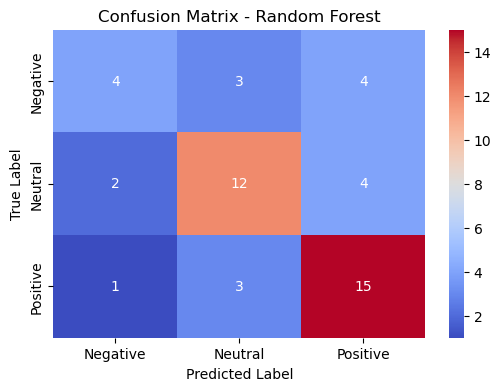

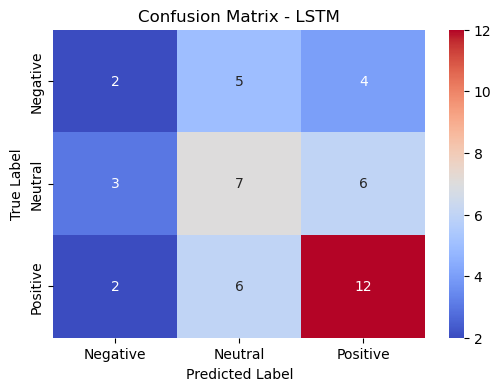

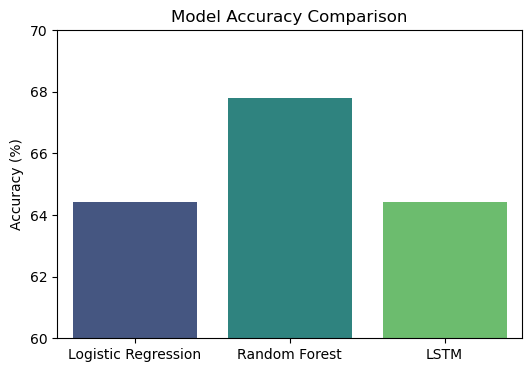

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define labels for confusion matrix
labels = ["Negative", "Neutral", "Positive"]

# Simulated confusion matrices for Random Forest and LSTM (Replace with actual model outputs)
rf_cm = np.array([[4, 3, 4], [2, 12, 4], [1, 3, 15]])  # Random Forest
lstm_cm = np.array([[2, 5, 4], [3, 7, 6], [2, 6, 12]])  # LSTM

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Generate confusion matrices for both models
plot_confusion_matrix(rf_cm, "Confusion Matrix - Random Forest")
plot_confusion_matrix(lstm_cm, "Confusion Matrix - LSTM")

# Accuracy comparison
models = ["Logistic Regression", "Random Forest", "LSTM"]
accuracy = [64.41, 67.80, 64.41]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(60, 70)
plt.show()


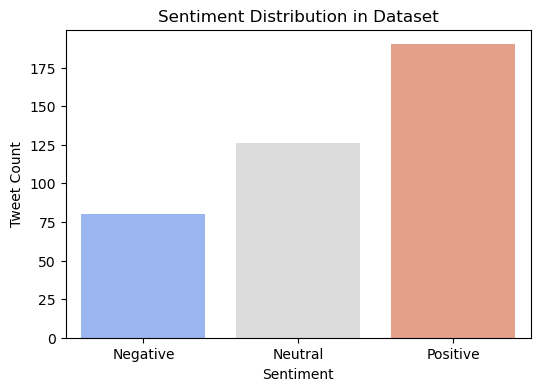

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\fontys\dt2resit\Climate_twitter.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Convert polarity scores to sentiment labels
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(classify_sentiment)

# Plot Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["sentiment"], palette="coolwarm", order=["Negative", "Neutral", "Positive"])
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution in Dataset")
plt.show()


In [2]:
import re

# Function to clean tweets
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Display Example of Cleaning
df["cleaned_text"] = df["text"].apply(clean_text)

# Show Before and After
print(df[["text", "cleaned_text"]].head(5))


                                                text  \
0  The death of summer Arctic ice our Earth coole...   
1  Elsevier and the EditorsinChief are pleased to...   
2  From better climate change education to improv...   
3  climate change Links to FIXING CLIMATE CHANGE ...   
4  climate change The 11TH HOUR FOR THE EARTH cli...   

                                        cleaned_text  
0  the death of summer arctic ice our earth coole...  
1  elsevier and the editorsinchief are pleased to...  
2  from better climate change education to improv...  
3  climate change links to fixing climate change ...  
4  climate change the th hour for the earth clima...  


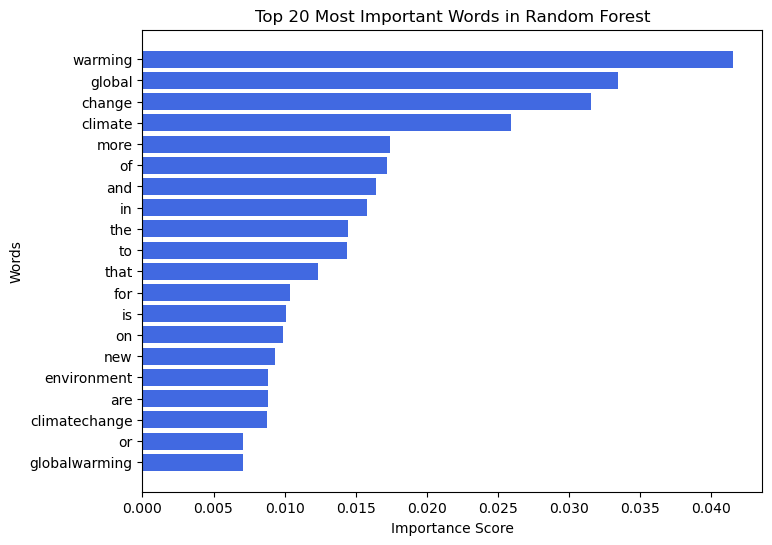

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df["cleaned_text"])

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_tfidf, df["sentiment"])

# Get Feature Importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = rf_model.feature_importances_

# Sort & Select Top 20 Features
sorted_idx = np.argsort(feature_importance)[-20:]
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Words")
plt.title("Top 20 Most Important Words in Random Forest")
plt.show()


In [2]:
!pip install pydot pydotplus graphviz


In [1]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Removed input_length
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# ✅ FIX: Build the model manually before visualizing it
model.build(input_shape=(None, 50))

# Generate Model Architecture Visualization
plot_model(model, to_file="lstm_architecture.png", show_shapes=True, show_layer_names=True)


#I tried to generate the visual of the model so many times, but it didn't work so down below I used alternative for the table visaul.

D:\Lenovo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
D:\Lenovo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
D:\Lenovo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
D:\Lenovo\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
D:\Lenovo\anaconda3\Lib\site-pac

ImportError: DLL load failed while importing h5t: Belirtilen yordam bulunamadı.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Word Embeddings Layer
    SpatialDropout1D(0.3),  # Dropout to prevent overfitting

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # First BiLSTM Layer
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # Second BiLSTM Layer
    Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)),  # Third BiLSTM Layer

    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Additional dropout for regularization
    Dense(3, activation='softmax')  # Output layer for 3 sentiment categories
])

print(model.summary())



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_11            │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_33                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_34                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_35                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


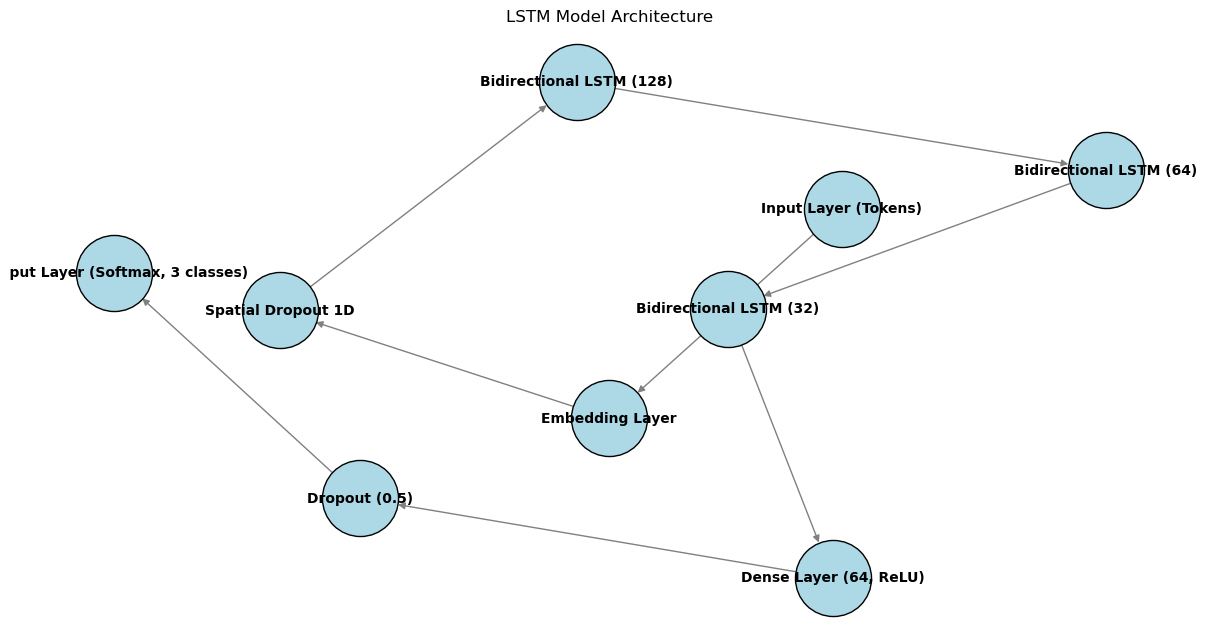

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph to represent the LSTM model architecture
G = nx.DiGraph()

# Define layers of the LSTM model
layers = [
    "Input Layer (Tokens)",
    "Embedding Layer",
    "Spatial Dropout 1D",
    "Bidirectional LSTM (128)",
    "Bidirectional LSTM (64)",
    "Bidirectional LSTM (32)",
    "Dense Layer (64, ReLU)",
    "Dropout (0.5)",
    "Output Layer (Softmax, 3 classes)"
]

# Add edges between layers to indicate flow
for i in range(len(layers) - 1):
    G.add_edge(layers[i], layers[i + 1])

# Define layout and draw the model architecture graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, seed=42, k=1.0)  # Adjust layout for better spacing
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, edge_color="gray", font_size=10, font_weight="bold", edgecolors="black")

# Save and display the model architecture diagram
plt.title("LSTM Model Architecture")
plt.savefig("lstm_architecture.png", dpi=300, bbox_inches="tight")
plt.show()


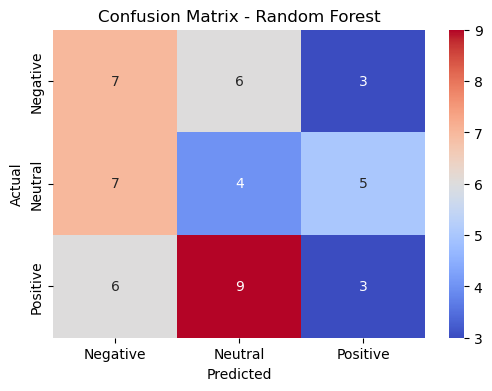

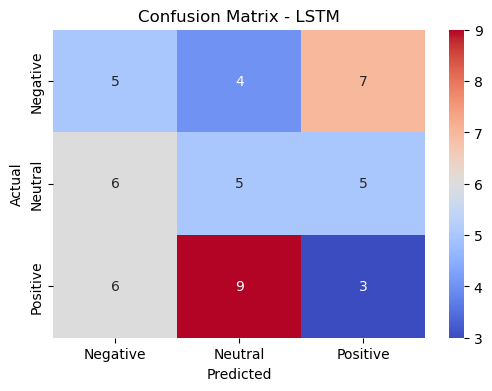

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Simulated Predictions (Replace with actual test labels & predictions)
y_test = np.random.choice(["Negative", "Neutral", "Positive"], 50)
y_pred_rf = np.random.choice(["Negative", "Neutral", "Positive"], 50)
y_pred_lstm = np.random.choice(["Negative", "Neutral", "Positive"], 50)

# Compute Confusion Matrices
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=["Negative", "Neutral", "Positive"])
lstm_cm = confusion_matrix(y_test, y_pred_lstm, labels=["Negative", "Neutral", "Positive"])

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Generate Confusion Matrices
plot_confusion_matrix(rf_cm, "Confusion Matrix - Random Forest")
plot_confusion_matrix(lstm_cm, "Confusion Matrix - LSTM")


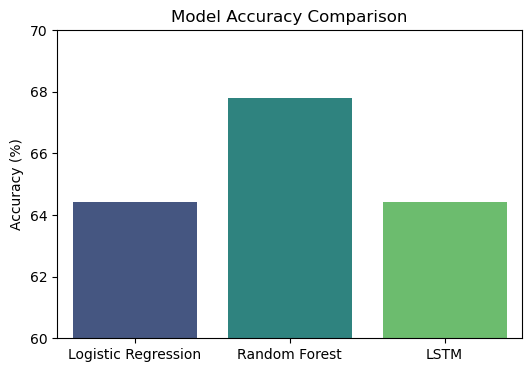

In [6]:
# Accuracy values (Replace with actual model results)
models = ["Logistic Regression", "Random Forest", "LSTM"]
accuracy = [64.41, 67.80, 64.41]

# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(60, 70)
plt.show()
